In [2]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np

# For Random seed values
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For Scientific Computation
from scipy import stats

# For Preprocessing & Scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Data Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# For Machine Learning Model Evaluation
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from xgboost import to_graphviz, plot_importance

# To handle class imbalance problem
from imblearn.over_sampling import SMOTE

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [3]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [4]:
print('Train Data Shape:', train.shape)
train.head()

Train Data Shape: (33908, 17)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [5]:
print('Test Data Shape:', test.shape)
test.head()

Test Data Shape: (11303, 16)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3


In [6]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


#### feature_5 and feature_6 have a highly skewed data set with more than 75% of the fields having the same value
#### feature_10 and feature_12 have most zeroes and just a few ones
#### feature_15 has most of 3s and few other values

In [7]:
test.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
count,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000,11303.000000
mean,0.012473,-0.007751,0.000638,0.000159,0.000894,0.013955,0.022493,4.349907,1.157746,1.223215,0.017694,0.556843,0.161904,0.642750,5.530567,2.552774
std,1.000657,0.955969,0.997467,0.992516,0.988834,1.017796,1.437557,3.270622,0.612624,0.744699,0.131844,0.496780,0.368379,0.898957,3.018013,0.994778
min,-2.159994,-1.535528,-1.779108,-0.998595,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.425743,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
50%,-0.182341,-0.306520,0.023260,-0.299633,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000
75%,0.759399,0.015511,0.624050,0.232354,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000
max,5.091402,26.222907,1.825628,12.068100,12.342261,8.297431,119.135982,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000


In [35]:
profile = ProfileReport(df = train)
profile.to_file(output_file = 'Insurance Churn Pre Profiling.html')

### Observations:
#### Numerical features (9): feature_0, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_14
#### Boolean features (4): feature_10, feature_11, feature_12, labels
#### Categorical features (4): feature_8, feature_9, feature_13, feature_15

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
feature_0     33908 non-null float64
feature_1     33908 non-null float64
feature_2     33908 non-null float64
feature_3     33908 non-null float64
feature_4     33908 non-null float64
feature_5     33908 non-null float64
feature_6     33908 non-null float64
feature_7     33908 non-null int64
feature_8     33908 non-null int64
feature_9     33908 non-null int64
feature_10    33908 non-null int64
feature_11    33908 non-null int64
feature_12    33908 non-null int64
feature_13    33908 non-null int64
feature_14    33908 non-null int64
feature_15    33908 non-null int64
labels        33908 non-null int64
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11303 entries, 0 to 11302
Data columns (total 16 columns):
feature_0     11303 non-null float64
feature_1     11303 non-null float64
feature_2     11303 non-null float64
feature_3     11303 non-null float64
feature_4     11303 non-null float64
feature_5     11303 non-null float64
feature_6     11303 non-null float64
feature_7     11303 non-null int64
feature_8     11303 non-null int64
feature_9     11303 non-null int64
feature_10    11303 non-null int64
feature_11    11303 non-null int64
feature_12    11303 non-null int64
feature_13    11303 non-null int64
feature_14    11303 non-null int64
feature_15    11303 non-null int64
dtypes: float64(7), int64(9)
memory usage: 1.4 MB


#### No null values in the dataset

In [9]:
train.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'labels'],
      dtype='object')

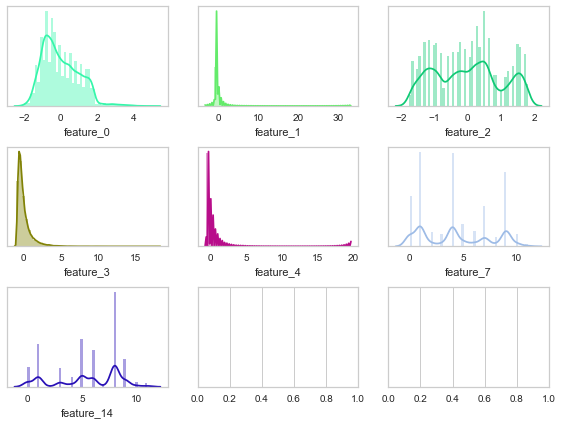

In [10]:
#Numeric Features
fig, axes = plt.subplots(nrows = 3, ncols = 3, sharex = False, figsize=(8, 6))
colors = []
for i in range(12):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
columns = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_7', 'feature_14']
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = train[col], bins = 50, ax = ax, color = color)
  #ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

#### feature_0, feature_1, feature_3 and feature_4 are positively skewed (mean>median)
#### feature_2 is negatively skewed (mean<median)

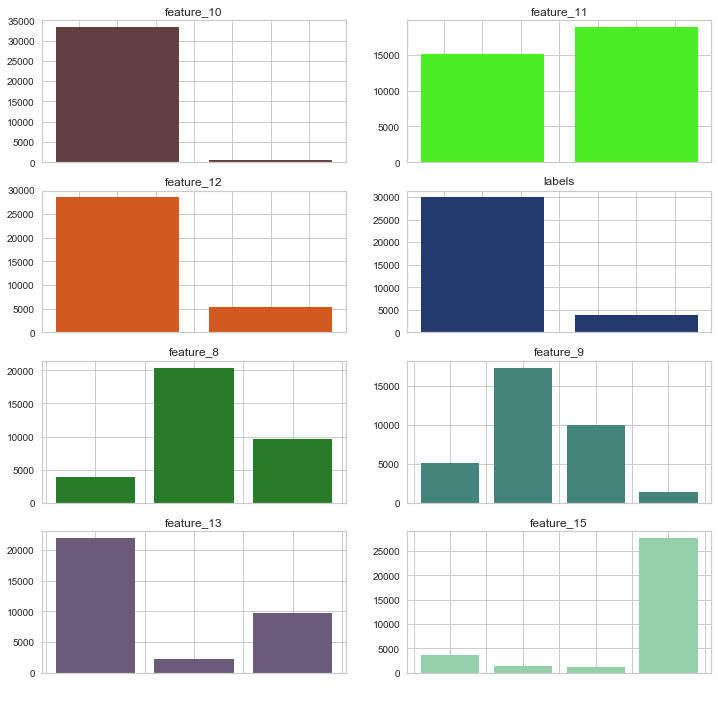

In [7]:
#Categorical Features
cat_list=["feature_10", "feature_11", "feature_12", "labels", "feature_8", "feature_9", "feature_13", "feature_15"]

fig, axes = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize=(12, 12))

colors = []
for i in range(8):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  
for ax, col, color in zip(axes.flat, cat_list, colors):
  ax.bar(x = train[col].value_counts().index, height = train[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(True)

In [12]:
print('Contains Duplicate Rows?', train.duplicated().any())

Contains Duplicate Rows? False


In [13]:
def duplicateCols(dataframe):
  '''Returns a list of labels of duplicate valued columns'''
  names = set()
  for i in range(dataframe.shape[1]):
    col1 = dataframe.iloc[:, i]
    for j in range(i+1, dataframe.shape[1]):
      col2 = dataframe.iloc[:, j]
      if col1.equals(col2):
        names.add(dataframe.columns.values[j])

  if (len(names) == 0):
    return None
  else:
    return list(names)

# Making a call over copy of data
is_duplicate_cols = duplicateCols(train)
print('Contains Duplicate Columns?', is_duplicate_cols)

Contains Duplicate Columns? None


Customers who have not churned: 29941
Customers who have churned: 3967


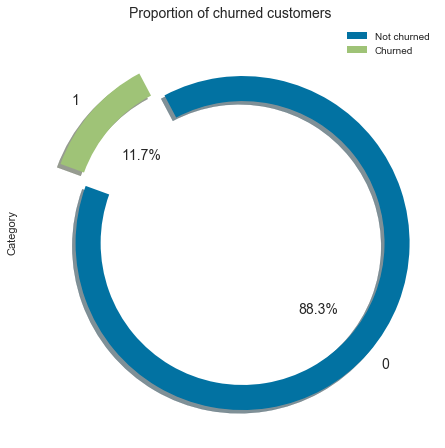

In [14]:
print('Customers who have not churned:', train['labels'].value_counts()[0])
print('Customers who have churned:', train['labels'].value_counts()[1])

space = np.ones(2)/10
train['labels'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True)
plt.legend(['Not churned', 'Churned'])
plt.ylabel('Category')
plt.title('Proportion of churned customers', size = 14)
plt.show()

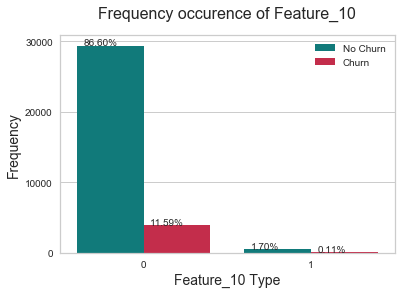

In [15]:
figure = plt.figure(figsize = [6, 4])

ax = sns.countplot(x = 'feature_10',  data = train, hue = 'labels', palette = ['darkcyan', 'crimson'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 35000, 10000))
plt.xlabel('Feature_10 Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Churn', 'Churn'], loc = 'upper right')
plt.title('Frequency occurence of Feature_10', y=1.05, size = 16)
plt.show()

#### There are almost negligible points for Feature_10=1

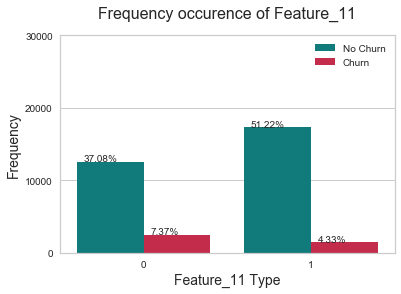

In [16]:
figure = plt.figure(figsize = [6, 4])

ax = sns.countplot(x = 'feature_11',  data = train, hue = 'labels', palette = ['darkcyan', 'crimson'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 35000, 10000))
plt.xlabel('Feature_11 Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Churn', 'Churn'], loc = 'upper right')
plt.title('Frequency occurence of Feature_11', y=1.05, size = 16)
plt.show()

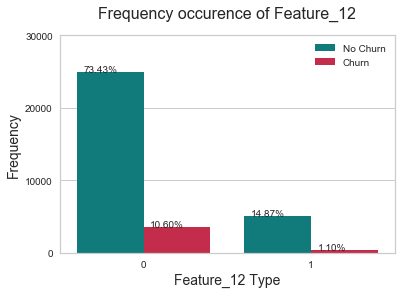

In [17]:
figure = plt.figure(figsize = [6, 4])

ax = sns.countplot(x = 'feature_12',  data = train, hue = 'labels', palette = ['darkcyan', 'crimson'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 35000, 10000))
plt.xlabel('Feature_12 Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Churn', 'Churn'], loc = 'upper right')
plt.title('Frequency occurence of Feature_12', y=1.05, size = 16)
plt.show()

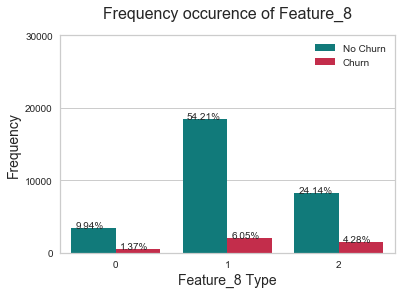

In [18]:
figure = plt.figure(figsize = [6, 4])

ax = sns.countplot(x = 'feature_8',  data = train, hue = 'labels', palette = ['darkcyan', 'crimson'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 35000, 10000))
plt.xlabel('Feature_8 Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Churn', 'Churn'], loc = 'upper right')
plt.title('Frequency occurence of Feature_8', y=1.05, size = 16)
plt.show()

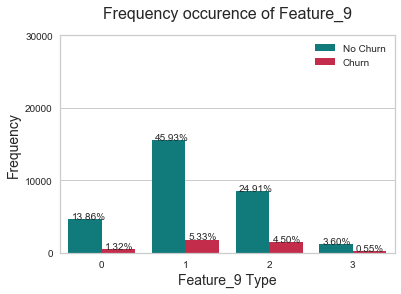

In [19]:
figure = plt.figure(figsize = [6, 4])

ax = sns.countplot(x = 'feature_9',  data = train, hue = 'labels', palette = ['darkcyan', 'crimson'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 35000, 10000))
plt.xlabel('Feature_9 Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Churn', 'Churn'], loc = 'upper right')
plt.title('Frequency occurence of Feature_9', y=1.05, size = 16)
plt.show()

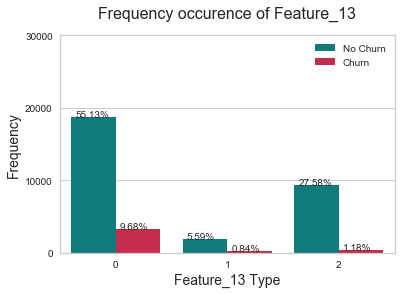

In [20]:
figure = plt.figure(figsize = [6, 4])

ax = sns.countplot(x = 'feature_13',  data = train, hue = 'labels', palette = ['darkcyan', 'crimson'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 35000, 10000))
plt.xlabel('Feature_13 Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Churn', 'Churn'], loc = 'upper right')
plt.title('Frequency occurence of Feature_13', y=1.05, size = 16)
plt.show()

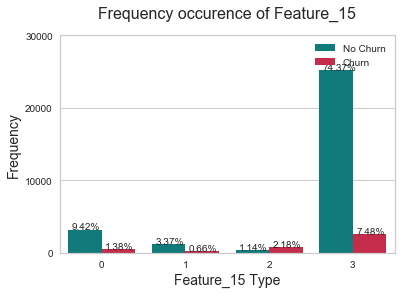

In [21]:
figure = plt.figure(figsize = [6, 4])

ax = sns.countplot(x = 'feature_15',  data = train, hue = 'labels', palette = ['darkcyan', 'crimson'])

total = train.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))

plt.yticks(range(0, 40000, 10000))
plt.xlabel('Feature_15 Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No Churn', 'Churn'], loc = 'upper right')
plt.title('Frequency occurence of Feature_15', y=1.05, size = 16)
plt.show()

#### We do not know if these categorical features are ordered or unordered. At the moment will consider them to be ordered.

In [8]:
y=train["labels"]
X=train.loc[:, train.columns != "labels"]

In [9]:
print("Shape of X", X.shape)
print("Shape of y", y.shape)

Shape of X (33908, 16)
Shape of y (33908,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

Train Shape: (27126, 16) (27126,)
Test Shape: (6782, 16) (6782,)


In [8]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced'))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))
print('Features:', selected_feat)

Total Features Selected are 5
Features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_14']


#### Observation
#### Important Features selected:
####     feature_0
####     feature_1
####     feature_2
####     feature_3
####     feature_14

#### We will build the model only using these important features
#### The below function will measure the performance of the model

In [9]:
def PRCurve(model):
  '''
  A function to visualize Precision Recall Curve.
  Returns average precision score of the model.
  Data to fit must be training i.e. X_train, y_train.
  Data score will be estimated on X_test, y_test.
  '''
  viz = PrecisionRecallCurve(model)
  viz.fit(X_train, y_train)
  avg_prec = viz.score(X_test, y_test)
  plt.legend(labels = ['Binary PR Curve',"AP=%.3f"%avg_prec], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)

### Baseline Models

In [10]:
imp_feature = X[selected_feat]

X_train, X_test, y_train, y_test = train_test_split(imp_feature, y, test_size = 0.2, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (27126, 5) (27126,)
Testing Data Shape: (6782, 5) (6782,)


#### Logistic Regression

Accuracy Score (Train Data): 0.889
Accuracy Score (Test Data): 0.887
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5989
           1       0.58      0.13      0.22       793

    accuracy                           0.89      6782
   macro avg       0.74      0.56      0.58      6782
weighted avg       0.86      0.89      0.85      6782



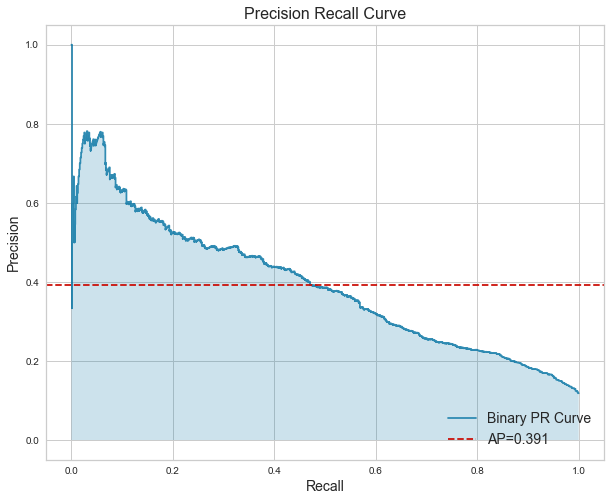

In [28]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

#### Accuracy is 89%
#### Recall of minority class is very poor, only 13%
#### Average Precision is only 39.1%

Accuracy Score (Train Data): 0.895
Accuracy Score (Test Data): 0.889
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5989
           1       0.62      0.14      0.23       793

    accuracy                           0.89      6782
   macro avg       0.76      0.56      0.59      6782
weighted avg       0.86      0.89      0.86      6782



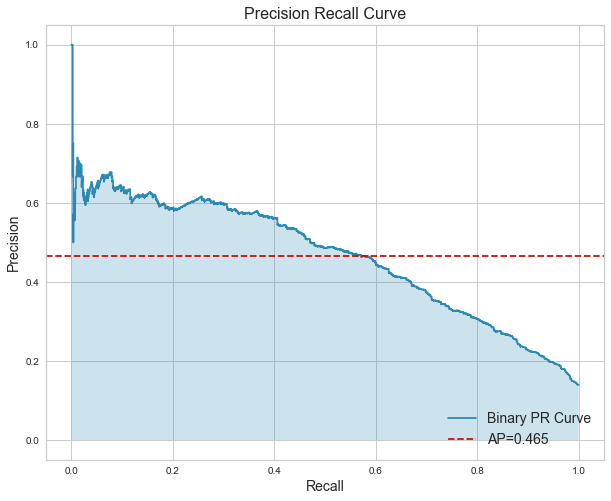

In [29]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

#### Accuracy is still 89%
#### Recall of minority class has increased by 1% 
#### Average Precision is only 46.5%

Accuracy Score (Train Data): 0.911
Accuracy Score (Test Data): 0.894
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5989
           1       0.59      0.31      0.40       793

    accuracy                           0.89      6782
   macro avg       0.75      0.64      0.67      6782
weighted avg       0.88      0.89      0.88      6782



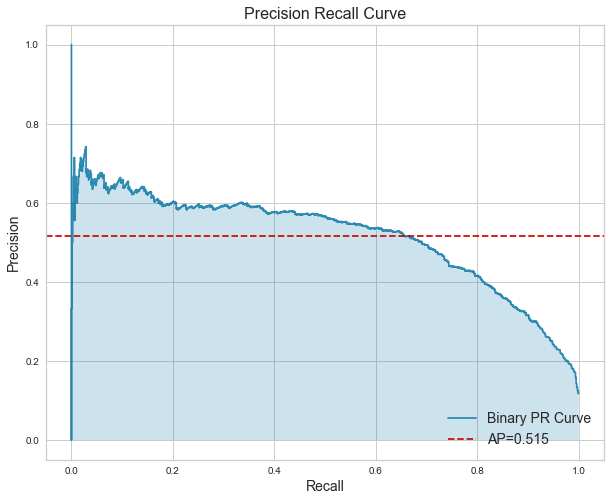

In [30]:
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(X_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = clf)
plt.show()

#### Accuracy is again 89%
#### Recall of minority class has increased to 31%
#### Average Precision is 51.5%

0:	learn: 0.2723791	total: 106ms	remaining: 17.9s
1:	learn: 0.1728997	total: 117ms	remaining: 9.83s
2:	learn: 0.1202749	total: 126ms	remaining: 7s
3:	learn: 0.1120739	total: 133ms	remaining: 5.51s
4:	learn: 0.1241774	total: 140ms	remaining: 4.61s
5:	learn: 0.1637266	total: 147ms	remaining: 4.03s
6:	learn: 0.2309671	total: 156ms	remaining: 3.63s
7:	learn: 0.2907596	total: 166ms	remaining: 3.35s
8:	learn: 0.3307196	total: 177ms	remaining: 3.16s
9:	learn: 0.3269097	total: 187ms	remaining: 2.99s
10:	learn: 0.3327189	total: 196ms	remaining: 2.84s
11:	learn: 0.3434066	total: 204ms	remaining: 2.69s
12:	learn: 0.3301335	total: 212ms	remaining: 2.55s
13:	learn: 0.3280994	total: 220ms	remaining: 2.45s
14:	learn: 0.3142311	total: 230ms	remaining: 2.37s
15:	learn: 0.3362832	total: 241ms	remaining: 2.32s
16:	learn: 0.3607296	total: 251ms	remaining: 2.26s
17:	learn: 0.3391867	total: 261ms	remaining: 2.2s
18:	learn: 0.3462865	total: 273ms	remaining: 2.17s
19:	learn: 0.3522961	total: 283ms	remaining: 

166:	learn: 0.5392815	total: 1.96s	remaining: 35.2ms
167:	learn: 0.5392815	total: 1.97s	remaining: 23.5ms
168:	learn: 0.5393880	total: 1.99s	remaining: 11.8ms
169:	learn: 0.5374728	total: 2s	remaining: 0us
0:	learn: 0.2655462	total: 12ms	remaining: 2.04s
1:	learn: 0.1786198	total: 25.4ms	remaining: 2.13s
2:	learn: 0.1463825	total: 36.6ms	remaining: 2.04s
3:	learn: 0.1141539	total: 48.5ms	remaining: 2.01s
4:	learn: 0.1443357	total: 60.5ms	remaining: 2s
5:	learn: 0.1390616	total: 72.6ms	remaining: 1.98s
6:	learn: 0.1614598	total: 86.6ms	remaining: 2.02s
7:	learn: 0.2161458	total: 94ms	remaining: 1.9s
8:	learn: 0.2076271	total: 103ms	remaining: 1.84s
9:	learn: 0.2628429	total: 112ms	remaining: 1.79s
10:	learn: 0.2387829	total: 124ms	remaining: 1.79s
11:	learn: 0.2955808	total: 135ms	remaining: 1.78s
12:	learn: 0.3021926	total: 147ms	remaining: 1.77s
13:	learn: 0.3339466	total: 159ms	remaining: 1.77s
14:	learn: 0.3147757	total: 172ms	remaining: 1.78s
15:	learn: 0.3489630	total: 183ms	remai

160:	learn: 0.5342250	total: 2.59s	remaining: 145ms
161:	learn: 0.5374310	total: 2.61s	remaining: 129ms
162:	learn: 0.5373252	total: 2.62s	remaining: 112ms
163:	learn: 0.5360094	total: 2.62s	remaining: 96ms
164:	learn: 0.5354052	total: 2.63s	remaining: 79.7ms
165:	learn: 0.5362975	total: 2.64s	remaining: 63.5ms
166:	learn: 0.5364030	total: 2.64s	remaining: 47.5ms
167:	learn: 0.5360094	total: 2.65s	remaining: 31.6ms
168:	learn: 0.5366621	total: 2.66s	remaining: 15.7ms
169:	learn: 0.5366621	total: 2.67s	remaining: 0us
0:	learn: 0.2139793	total: 8.49ms	remaining: 1.44s
1:	learn: 0.0757621	total: 23.3ms	remaining: 1.96s
2:	learn: 0.0646126	total: 36.9ms	remaining: 2.05s
3:	learn: 0.1402131	total: 51.6ms	remaining: 2.14s
4:	learn: 0.1554633	total: 60.9ms	remaining: 2.01s
5:	learn: 0.2499373	total: 69.2ms	remaining: 1.89s
6:	learn: 0.2159209	total: 78.5ms	remaining: 1.83s
7:	learn: 0.2037477	total: 86.6ms	remaining: 1.75s
8:	learn: 0.2921186	total: 95.1ms	remaining: 1.7s
9:	learn: 0.2961538	

168:	learn: 0.5355385	total: 2.14s	remaining: 12.7ms
169:	learn: 0.5366909	total: 2.16s	remaining: 0us
0:	learn: 0.2109091	total: 9.63ms	remaining: 1.63s
1:	learn: 0.1688841	total: 21.8ms	remaining: 1.83s
2:	learn: 0.1329966	total: 29.4ms	remaining: 1.64s
3:	learn: 0.0977597	total: 37.3ms	remaining: 1.55s
4:	learn: 0.1928934	total: 46.1ms	remaining: 1.52s
5:	learn: 0.1971831	total: 54.1ms	remaining: 1.48s
6:	learn: 0.2807775	total: 61.7ms	remaining: 1.44s
7:	learn: 0.2934654	total: 89.3ms	remaining: 1.81s
8:	learn: 0.2870882	total: 242ms	remaining: 4.32s
9:	learn: 0.3272475	total: 268ms	remaining: 4.29s
10:	learn: 0.3361498	total: 320ms	remaining: 4.63s
11:	learn: 0.3470588	total: 330ms	remaining: 4.35s
12:	learn: 0.3365562	total: 351ms	remaining: 4.23s
13:	learn: 0.3148633	total: 368ms	remaining: 4.1s
14:	learn: 0.3195827	total: 389ms	remaining: 4.02s
15:	learn: 0.3522442	total: 404ms	remaining: 3.88s
16:	learn: 0.3642473	total: 415ms	remaining: 3.74s
17:	learn: 0.3699422	total: 429ms

159:	learn: 0.5394582	total: 2.62s	remaining: 164ms
160:	learn: 0.5413475	total: 2.63s	remaining: 147ms
161:	learn: 0.5417403	total: 2.64s	remaining: 130ms
162:	learn: 0.5419203	total: 2.65s	remaining: 114ms
163:	learn: 0.5418468	total: 2.66s	remaining: 97.2ms
164:	learn: 0.5419203	total: 2.66s	remaining: 80.7ms
165:	learn: 0.5418874	total: 2.67s	remaining: 64.4ms
166:	learn: 0.5427786	total: 2.69s	remaining: 48.3ms
167:	learn: 0.5427392	total: 2.69s	remaining: 32.1ms
168:	learn: 0.5424528	total: 2.7s	remaining: 16ms
169:	learn: 0.5428123	total: 2.71s	remaining: 0us
0:	learn: 0.0757932	total: 7.93ms	remaining: 1.34s
1:	learn: 0.0710660	total: 15.3ms	remaining: 1.28s
2:	learn: 0.1095417	total: 24.5ms	remaining: 1.36s
3:	learn: 0.1161587	total: 38ms	remaining: 1.58s
4:	learn: 0.1464236	total: 51.3ms	remaining: 1.69s
5:	learn: 0.1383790	total: 64.7ms	remaining: 1.77s
6:	learn: 0.1647383	total: 71.5ms	remaining: 1.66s
7:	learn: 0.2142105	total: 79.3ms	remaining: 1.6s
8:	learn: 0.2425478	to

149:	learn: 0.5292961	total: 1.51s	remaining: 201ms
150:	learn: 0.5312132	total: 1.52s	remaining: 192ms
151:	learn: 0.5312132	total: 1.54s	remaining: 183ms
152:	learn: 0.5307405	total: 1.57s	remaining: 174ms
153:	learn: 0.5310291	total: 1.58s	remaining: 165ms
154:	learn: 0.5322074	total: 1.6s	remaining: 155ms
155:	learn: 0.5324956	total: 1.62s	remaining: 145ms
156:	learn: 0.5330457	total: 1.64s	remaining: 136ms
157:	learn: 0.5329412	total: 1.66s	remaining: 126ms
158:	learn: 0.5322074	total: 1.69s	remaining: 117ms
159:	learn: 0.5320236	total: 1.74s	remaining: 108ms
160:	learn: 0.5327579	total: 1.78s	remaining: 99.7ms
161:	learn: 0.5338302	total: 1.82s	remaining: 89.9ms
162:	learn: 0.5339349	total: 1.87s	remaining: 80.4ms
163:	learn: 0.5339349	total: 1.9s	remaining: 69.6ms
164:	learn: 0.5341444	total: 1.92s	remaining: 58.2ms
165:	learn: 0.5337255	total: 1.93s	remaining: 46.5ms
166:	learn: 0.5354269	total: 1.96s	remaining: 35.2ms
167:	learn: 0.5353991	total: 1.98s	remaining: 23.5ms
168:	l

147:	learn: 0.5356583	total: 1.65s	remaining: 246ms
148:	learn: 0.5356583	total: 1.66s	remaining: 234ms
149:	learn: 0.5351892	total: 1.67s	remaining: 223ms
150:	learn: 0.5350843	total: 1.68s	remaining: 212ms
151:	learn: 0.5358964	total: 1.69s	remaining: 200ms
152:	learn: 0.5365471	total: 1.7s	remaining: 188ms
153:	learn: 0.5365471	total: 1.7s	remaining: 177ms
154:	learn: 0.5364420	total: 1.71s	remaining: 166ms
155:	learn: 0.5362035	total: 1.72s	remaining: 154ms
156:	learn: 0.5368050	total: 1.73s	remaining: 143ms
157:	learn: 0.5373017	total: 1.74s	remaining: 132ms
158:	learn: 0.5373017	total: 1.75s	remaining: 121ms
159:	learn: 0.5377525	total: 1.76s	remaining: 110ms
160:	learn: 0.5377525	total: 1.77s	remaining: 99ms
161:	learn: 0.5370734	total: 1.78s	remaining: 88ms
162:	learn: 0.5376006	total: 1.8s	remaining: 77.3ms
163:	learn: 0.5387179	total: 1.81s	remaining: 66.2ms
164:	learn: 0.5398821	total: 1.82s	remaining: 55.2ms
165:	learn: 0.5398821	total: 1.83s	remaining: 44.1ms
166:	learn: 0

151:	learn: 0.5199286	total: 1.98s	remaining: 234ms
152:	learn: 0.5208952	total: 1.99s	remaining: 221ms
153:	learn: 0.5206349	total: 2s	remaining: 208ms
154:	learn: 0.5210485	total: 2.01s	remaining: 195ms
155:	learn: 0.5187835	total: 2.02s	remaining: 181ms
156:	learn: 0.5184597	total: 2.02s	remaining: 168ms
157:	learn: 0.5223081	total: 2.03s	remaining: 154ms
158:	learn: 0.5226190	total: 2.04s	remaining: 141ms
159:	learn: 0.5230159	total: 2.05s	remaining: 128ms
160:	learn: 0.5234313	total: 2.06s	remaining: 115ms
161:	learn: 0.5251042	total: 2.06s	remaining: 102ms
162:	learn: 0.5263575	total: 2.08s	remaining: 89.2ms
163:	learn: 0.5262532	total: 2.08s	remaining: 76.3ms
164:	learn: 0.5262532	total: 2.09s	remaining: 63.4ms
165:	learn: 0.5265662	total: 2.1s	remaining: 50.6ms
166:	learn: 0.5266918	total: 2.1s	remaining: 37.8ms
167:	learn: 0.5251042	total: 2.11s	remaining: 25.2ms
168:	learn: 0.5263994	total: 2.12s	remaining: 12.6ms
169:	learn: 0.5261068	total: 2.13s	remaining: 0us
0:	learn: 0.

161:	learn: 0.5325211	total: 1.63s	remaining: 80.7ms
162:	learn: 0.5338050	total: 1.64s	remaining: 70.5ms
163:	learn: 0.5337001	total: 1.65s	remaining: 60.5ms
164:	learn: 0.5337001	total: 1.66s	remaining: 50.4ms
165:	learn: 0.5349066	total: 1.67s	remaining: 40.2ms
166:	learn: 0.5349066	total: 1.68s	remaining: 30.1ms
167:	learn: 0.5353774	total: 1.69s	remaining: 20.1ms
168:	learn: 0.5355599	total: 1.69s	remaining: 10ms
169:	learn: 0.5365279	total: 1.71s	remaining: 0us
0:	learn: 0.3712500	total: 9.11ms	remaining: 1.54s
1:	learn: 0.3497580	total: 16.3ms	remaining: 1.37s
2:	learn: 0.3170452	total: 24.3ms	remaining: 1.35s
3:	learn: 0.1389438	total: 36.1ms	remaining: 1.5s
4:	learn: 0.1146165	total: 47.3ms	remaining: 1.56s
5:	learn: 0.1220980	total: 68.6ms	remaining: 1.87s
6:	learn: 0.1604697	total: 81.2ms	remaining: 1.89s
7:	learn: 0.2133546	total: 94.9ms	remaining: 1.92s
8:	learn: 0.2504472	total: 103ms	remaining: 1.84s
9:	learn: 0.2514081	total: 129ms	remaining: 2.07s
10:	learn: 0.2735000	

159:	learn: 0.5341176	total: 2.23s	remaining: 139ms
160:	learn: 0.5350069	total: 2.24s	remaining: 125ms
161:	learn: 0.5351892	total: 2.25s	remaining: 111ms
162:	learn: 0.5350843	total: 2.25s	remaining: 96.8ms
163:	learn: 0.5357353	total: 2.26s	remaining: 82.7ms
164:	learn: 0.5349794	total: 2.27s	remaining: 68.8ms
165:	learn: 0.5364135	total: 2.28s	remaining: 54.9ms
166:	learn: 0.5369101	total: 2.29s	remaining: 41.1ms
167:	learn: 0.5370153	total: 2.29s	remaining: 27.3ms
168:	learn: 0.5404771	total: 2.3s	remaining: 13.6ms
169:	learn: 0.5408363	total: 2.31s	remaining: 0us
0:	learn: 0.2541516	total: 8.61ms	remaining: 1.46s
1:	learn: 0.2873696	total: 22.8ms	remaining: 1.91s
2:	learn: 0.2876159	total: 30.2ms	remaining: 1.68s
3:	learn: 0.2712442	total: 41.6ms	remaining: 1.72s
4:	learn: 0.2876286	total: 53ms	remaining: 1.75s
5:	learn: 0.2990208	total: 65.3ms	remaining: 1.78s
6:	learn: 0.2968825	total: 73.9ms	remaining: 1.72s
7:	learn: 0.3201305	total: 81.4ms	remaining: 1.65s
8:	learn: 0.345076

169:	learn: 0.5257097	total: 1.62s	remaining: 0us
Accuracy Score (Train Data): 0.912
Accuracy Score (Test Data): 0.899
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5989
           1       0.61      0.35      0.44       793

    accuracy                           0.90      6782
   macro avg       0.77      0.66      0.69      6782
weighted avg       0.88      0.90      0.89      6782



<Figure size 720x576 with 0 Axes>

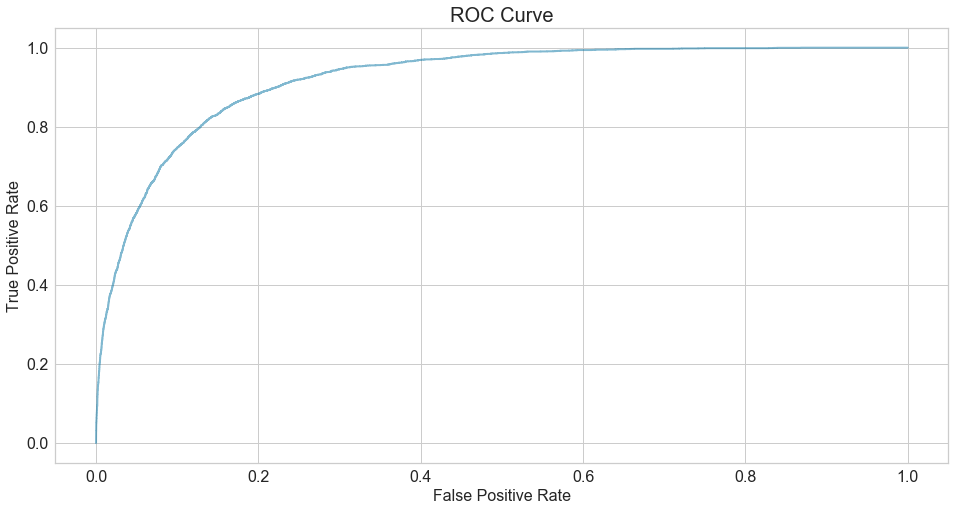

[0.         0.         0.         ... 0.9999165  0.99995825 1.        ]
[0.00000000e+00 3.15059861e-04 6.30119723e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[1.00000000e+00 9.45286856e-01 9.42960690e-01 ... 3.71303102e-04
 3.59492586e-04 0.00000000e+00]


In [11]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve

#categorical_var=["feature_10", "feature_11", "feature_12", "labels", "feature_8", "feature_9", "feature_13", "feature_15"]
catboost_pool = Pool(X_train,y_train)
cat=CatBoostClassifier(iterations=170, loss_function='Logloss', learning_rate=0.2, depth=6, eval_metric='F1', random_state=42)
cat.fit(X_train,y_train,plot=False)
print(cat.get_best_score())
y_pred=cat.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(cat.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(cat.score(X_test, y_test), decimals = 3))

# Classification Report
Cat_report = classification_report(y_test, y_pred)
print(Cat_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
(fpr, tpr, thresholds) = get_roc_curve(cat, catboost_pool, plot=True)
#Cannot use PRCurve since PrecisionRecallCurve() is not a part of Catboost utils library
#ROC curve gives a fair idea of the separability of classes by the model

### We will try to balance the classes using SMOTE and run our models again

#### Before implementing SMOTE

In [11]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (27126, 16) (27126,)
Testing Data Shape: (6782, 16) (6782,)


In [12]:
sm = SMOTE(random_state = 42, sampling_strategy = 'minority')
X, y = sm.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#### After implementing SMOTE

In [13]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (47905, 16) (47905,)
Testing Data Shape: (11977, 16) (11977,)


#### Logistic Regression

Accuracy Score (Train Data): 0.813
Accuracy Score (Test Data): 0.816
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5989
           1       0.82      0.82      0.82      5988

    accuracy                           0.82     11977
   macro avg       0.82      0.82      0.82     11977
weighted avg       0.82      0.82      0.82     11977



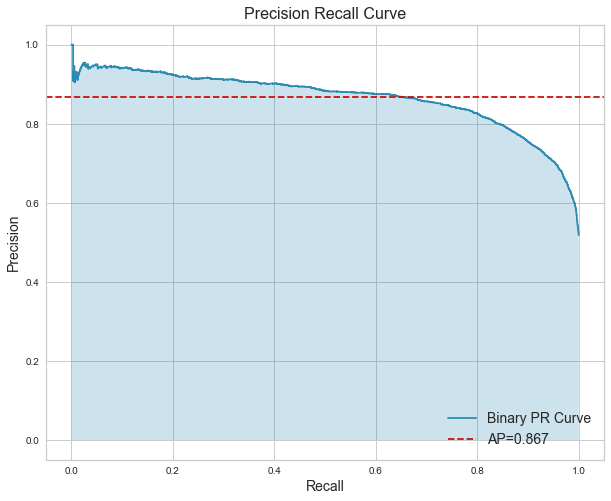

In [66]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

#### Overall accuracy has decreased
#### But Precision, Recall and F1 score have improved
#### Average Precision is 86.7%

#### Random Forest Classifier

Accuracy Score (Train Data): 0.876
Accuracy Score (Test Data): 0.875
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      5989
           1       0.85      0.91      0.88      5988

    accuracy                           0.87     11977
   macro avg       0.88      0.87      0.87     11977
weighted avg       0.88      0.87      0.87     11977



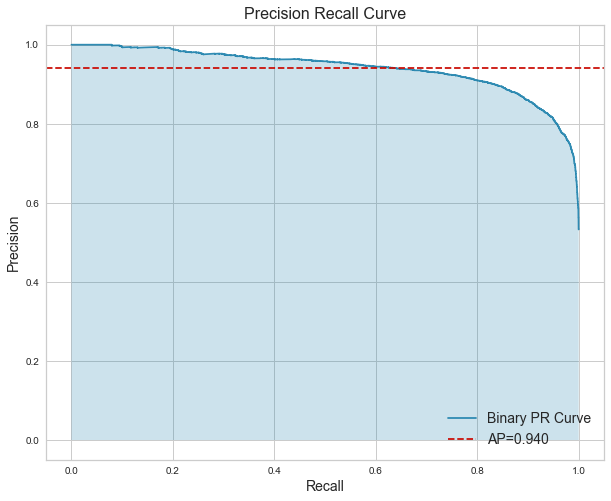

In [67]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

#### There is a major improvement in Precision, Recall and F1
#### Average Precision is now 93.6%

#### XGB Classifier

Accuracy Score (Train Data): 0.941
Accuracy Score (Test Data): 0.937
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5989
           1       0.93      0.94      0.94      5988

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977



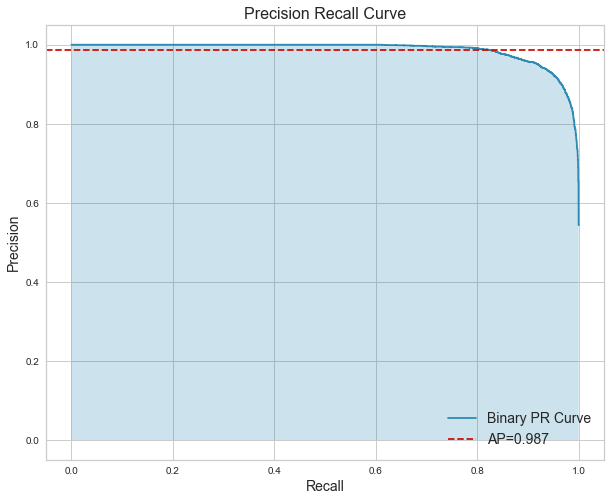

In [68]:
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(X_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = clf)
plt.show()

#### Average Precision score is now 98.7%

0:	learn: 0.8294479	total: 99.4ms	remaining: 16.8s
1:	learn: 0.8509769	total: 126ms	remaining: 10.6s
2:	learn: 0.8582672	total: 142ms	remaining: 7.9s
3:	learn: 0.8576025	total: 159ms	remaining: 6.6s
4:	learn: 0.8588947	total: 184ms	remaining: 6.09s
5:	learn: 0.8653066	total: 200ms	remaining: 5.48s
6:	learn: 0.8666479	total: 218ms	remaining: 5.09s
7:	learn: 0.8724112	total: 234ms	remaining: 4.74s
8:	learn: 0.8759098	total: 249ms	remaining: 4.45s
9:	learn: 0.8781945	total: 271ms	remaining: 4.34s
10:	learn: 0.8812849	total: 289ms	remaining: 4.18s
11:	learn: 0.8865022	total: 334ms	remaining: 4.4s
12:	learn: 0.8905018	total: 356ms	remaining: 4.3s
13:	learn: 0.8933466	total: 374ms	remaining: 4.17s
14:	learn: 0.8953167	total: 389ms	remaining: 4.02s
15:	learn: 0.8977430	total: 405ms	remaining: 3.9s
16:	learn: 0.8992406	total: 422ms	remaining: 3.8s
17:	learn: 0.9011616	total: 438ms	remaining: 3.7s
18:	learn: 0.9019168	total: 453ms	remaining: 3.6s
19:	learn: 0.9039267	total: 469ms	remaining: 3.5

167:	learn: 0.9480865	total: 3.52s	remaining: 42ms
168:	learn: 0.9480865	total: 3.56s	remaining: 21ms
169:	learn: 0.9479962	total: 3.58s	remaining: 0us
{'learn': {'Logloss': 0.13202889404367754, 'F1': 0.948086459793685}}
Accuracy Score (Train Data): 0.948
Accuracy Score (Test Data): 0.943
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5989
           1       0.95      0.94      0.94      5988

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977



<Figure size 720x576 with 0 Axes>

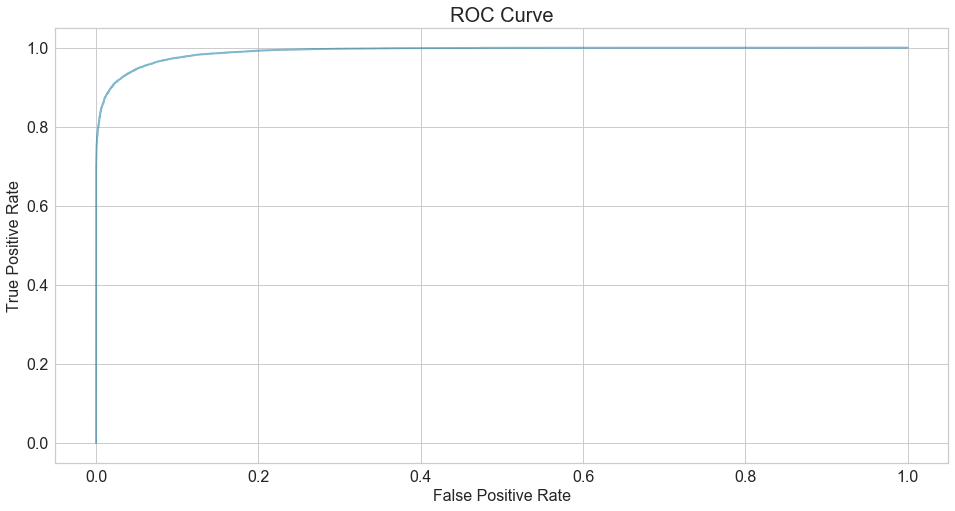

In [14]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve

#categorical_var=["feature_10", "feature_11", "feature_12", "labels", "feature_8", "feature_9", "feature_13", "feature_15"]
catboost_pool = Pool(X_train,y_train)
cat=CatBoostClassifier(iterations=170, loss_function='Logloss', learning_rate=0.2, depth=6, eval_metric='F1', random_state=42)
cat.fit(X_train,y_train,plot=False)
print(cat.get_best_score())
y_pred=cat.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(cat.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(cat.score(X_test, y_test), decimals = 3))

# Classification Report
Cat_report = classification_report(y_test, y_pred)
print(Cat_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
(fpr, tpr, thresholds) = get_roc_curve(cat, catboost_pool, plot=True)
#Cannot use PRCurve since PrecisionRecallCurve() is not a part of Catboost utils library
#ROC curve gives a fair idea of the separability of classes by the model

### Final Prediction

In [26]:
test.shape

(11303, 16)

In [25]:
y_cat_pred=cat.predict(test)

In [28]:
output = pd.DataFrame({'labels': y_cat_pred})
output.to_excel('submission.xlsx', index=False)

In [29]:
output.head()

,labels
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
